In [246]:
import pandas as pd
import numpy as np

In [247]:
df = pd.DataFrame({'A':['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B':['one', 'one', 'two', 'three',
                   'two', 'two', 'one', 'three'],
                   'C':np.random.randn(8),
                   'D':np.random.randn(8)})


In [248]:
df.head()

,A,B,C,D
0,foo,one,-0.741104,1.628478
1,bar,one,-0.517380,-0.591202
2,foo,two,0.935995,0.607965
3,bar,three,-0.024337,-1.359029
4,foo,two,-1.667648,-0.793736


In [249]:
grouped = df.groupby('A')

In [250]:
grouped.describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   3.0 -0.081722  0.409989 -0.517380 -0.270859 -0.024337  0.136107   
foo   5.0 -0.361974  1.658269 -2.090971 -1.667648 -0.741104  0.935995   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  0.296552   3.0 -0.393956  1.077324 -1.359029 -0.975116 -0.591202   
foo  1.753859   5.0  0.609036  1.300788 -0.793736 -0.556573  0.607965   

                         
          75%       max  
A                        
bar  0.088580  0.768362  
foo  1.628478  2.159043

In [251]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'constant'

In [252]:
grouped2 = df.groupby(get_letter_type, axis=1)

In [253]:
grouped2.describe()

25%        50%       75% count freq      max      mean  \
constant C  -0.97274  -0.270859  0.456413     8  NaN  1.75386 -0.256879   
         D -0.641835  0.0256963  0.983391     8  NaN  2.15904  0.232914   
vowel    A       NaN        NaN       NaN     8    5      NaN       NaN   

                min      std  top unique  
constant C -2.09097  1.28079  NaN    NaN  
         D -1.35903  1.25218  NaN    NaN  
vowel    A      NaN      NaN  foo      2

According to the Groupby documentation 

"Starting with 0.8, pandas Index objects now support duplicate values. If a non-unique index is used as the group key in a groupby operation, all values for the same index value will be considered to be in one group and thus the output of aggregation functions will only contain unique index values:"

In [254]:
first = [1,2,3,1,2,3]
s1 = pd.Series([1,2,3,10,20,30], first)

In [255]:
s1

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [256]:
grouped3 = s1.groupby(level=0)

In [257]:
grouped3.groups

{1: Int64Index([1, 1], dtype='int64'),
 2: Int64Index([2, 2], dtype='int64'),
 3: Int64Index([3, 3], dtype='int64')}

In [258]:
grouped3.describe()

,count,mean,std,min,25%,50%,75%,max
1,2.0,5.5,6.363961,1.0,3.25,5.5,7.75,10.0
2,2.0,11.0,12.727922,2.0,6.50,11.0,15.50,20.0
3,2.0,16.5,19.091883,3.0,9.75,16.5,23.25,30.0


In [259]:
grouped3.sum()

1    11
2    22
3    33
dtype: int64

In [260]:
grouped3.head()

1     1
2     2
3     3
1    10
2    20
3    30
dtype: int64

In [261]:
grouped3.mean()

1     5.5
2    11.0
3    16.5
dtype: float64

My initial though was that the group by function would create one index of unique value, and a new coumn would be created for each duplicate value. Groupby does not create a unique index more that the duplicate index values will be "considered" to be in one group. Therefore, as shown with the grouped.head() line, there is still a Series of 6 values, however when it comes to the output aggregation function used, it will consider the similar indicies as being in one group. This, grouped3.mean() showing only three index values instead of six.

GroupBy object attributes

In [262]:
df

,A,B,C,D
0,foo,one,-0.741104,1.628478
1,bar,one,-0.517380,-0.591202
2,foo,two,0.935995,0.607965
3,bar,three,-0.024337,-1.359029
4,foo,two,-1.667648,-0.793736
5,bar,two,0.296552,0.768362
6,foo,one,-2.090971,-0.556573
7,foo,three,1.753859,2.159043


When grouping by a column you create groups based on unique values in that column.

In [263]:
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [264]:
df.groupby('B').groups

{'one': Int64Index([0, 1, 6], dtype='int64'),
 'three': Int64Index([3, 7], dtype='int64'),
 'two': Int64Index([2, 4, 5], dtype='int64')}

In [265]:
df.groupby('C').groups

{-2.0909710760754643: Int64Index([6], dtype='int64'),
 -1.6676481984568134: Int64Index([4], dtype='int64'),
 -0.74110430255054649: Int64Index([0], dtype='int64'),
 -0.51738036242555485: Int64Index([1], dtype='int64'),
 -0.024337454383369296: Int64Index([3], dtype='int64'),
 0.29655168892154021: Int64Index([5], dtype='int64'),
 0.93599520518708423: Int64Index([2], dtype='int64'),
 1.7538591916130242: Int64Index([7], dtype='int64')}

In [266]:
df.groupby('D').groups

{-1.3590294107207557: Int64Index([3], dtype='int64'),
 -0.79373580045691572: Int64Index([4], dtype='int64'),
 -0.59120168239304427: Int64Index([1], dtype='int64'),
 -0.55657276136224521: Int64Index([6], dtype='int64'),
 0.60796528822370488: Int64Index([2], dtype='int64'),
 0.76836191350089911: Int64Index([5], dtype='int64'),
 1.6284784986626382: Int64Index([0], dtype='int64'),
 2.1590425090409839: Int64Index([7], dtype='int64')}

In [267]:
df.groupby(get_letter_type,axis=1).groups

{'constant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [268]:
grouped2.groups #from above

{'constant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [269]:
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [270]:
index = pd.MultiIndex.from_arrays(arrays, names=['first','second'])

In [271]:
s = pd.Series(np.random.randn(8), index=index)

In [272]:
s

first  second
bar    one       0.548486
       two      -1.583881
baz    one       1.283957
       two      -0.886094
foo    one       0.656899
       two      -0.399799
qux    one      -0.893027
       two      -0.358564
dtype: float64

In [273]:
grouped4 = s.groupby(level=0)

In [274]:
grouped4.groups

{'bar': MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[0, 0], [0, 1]],
            names=['first', 'second']),
 'baz': MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[1, 1], [0, 1]],
            names=['first', 'second']),
 'foo': MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[2, 2], [0, 1]],
            names=['first', 'second']),
 'qux': MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[3, 3], [0, 1]],
            names=['first', 'second'])}

In [275]:
grouped4.sum()

first
bar   -1.035395
baz    0.397863
foo    0.257101
qux   -1.251590
dtype: float64

In [276]:
grouped5 = s.groupby(level=1)
grouped5.sum()

second
one    1.596316
two   -3.228338
dtype: float64

In [277]:
grouped5.groups

{'one': MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[0, 1, 2, 3], [0, 0, 0, 0]],
            names=['first', 'second']),
 'two': MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
            labels=[[0, 1, 2, 3], [1, 1, 1, 1]],
            names=['first', 'second'])}

In [278]:
grouped6 = s.groupby(level='second')

In [279]:
grouped6.sum()

second
one    1.596316
two   -3.228338
dtype: float64

It looks like you have to use "Level=" when dealing with series. Whether the MultiIndex has names specificed or not. For DataFrames, you can just use the name of the Column

In [280]:
type(s)

pandas.core.series.Series

"The aggregation functions such as sum will take the level parameter directly. Additionally, the resulting index will be named according to the chosen level:"

In [281]:
s.sum(level='second')

second
one    1.596316
two   -3.228338
dtype: float64

In [282]:
type(df)

pandas.core.frame.DataFrame

In [283]:
df.head()

,A,B,C,D
0,foo,one,-0.741104,1.628478
1,bar,one,-0.517380,-0.591202
2,foo,two,0.935995,0.607965
3,bar,three,-0.024337,-1.359029
4,foo,two,-1.667648,-0.793736


In [284]:
df.sum()

A        foobarfoobarfoobarfoofoo
B    oneonetwothreetwotwoonethree
C                        -2.05504
D                         1.86331
dtype: object

In [285]:
df.sum(axis=1)

0    0.887374
1   -1.108582
2    1.543960
3   -1.383367
4   -2.461384
5    1.064914
6   -2.647544
7    3.912902
dtype: float64

In [286]:
df.agg(['count','sum'])

,A,B,C,D
count,8,8,8.000000,8.000000
sum,foobarfoobarfoobarfoofoo,oneonetwothreetwotwoonethree,-2.055035,1.863309


In [287]:
type(s)

pandas.core.series.Series

In [288]:
s

first  second
bar    one       0.548486
       two      -1.583881
baz    one       1.283957
       two      -0.886094
foo    one       0.656899
       two      -0.399799
qux    one      -0.893027
       two      -0.358564
dtype: float64

In [289]:
s.agg(['count','sum','max','min',np.sum, np.mean, np.std,])

count    8.000000
sum     -1.632022
max      1.283957
min     -1.583881
sum     -1.632022
mean    -0.204003
std      0.958251
dtype: float64

In [290]:
arrays2 = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

index2 = pd.MultiIndex.from_arrays(arrays2, names=['first','second'])


In [291]:
df2 = pd.DataFrame({'A': [1, 1, 1, 1, 2, 2, 3, 3],
                   'B': np.arange(8)},
                  index=index)

In [292]:
df2

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [293]:
df2.groupby([pd.Grouper(level='second'), 'A']).sum() 
#A Grouper allows the user to specify a groupby instruction for a target object

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [294]:
df2.groupby([pd.Grouper(level='first'), 'A']).sum() 

,,B
first,A,
bar,1,1
baz,1,5
foo,2,9
qux,3,13


Index levels may be specificed directly to groupby instead of using grouper.

In [295]:
df2.groupby(['first', 'A']).sum()

,,B
first,A,
bar,1,1
baz,1,5
foo,2,9
qux,3,13


Iterating over the group. First I'm showing what the DF looks like, but by itself and as a grouped object (in this case grouped by A). On first glance they look similar based on the describe function. However, you can iterate over the grouped object in a way you cannot do with the DF. 

In [296]:
df

,A,B,C,D
0,foo,one,-0.741104,1.628478
1,bar,one,-0.517380,-0.591202
2,foo,two,0.935995,0.607965
3,bar,three,-0.024337,-1.359029
4,foo,two,-1.667648,-0.793736
5,bar,two,0.296552,0.768362
6,foo,one,-2.090971,-0.556573
7,foo,three,1.753859,2.159043


In [297]:
grouped = df.groupby('A')
grouped.head()

,A,B,C,D
0,foo,one,-0.741104,1.628478
1,bar,one,-0.517380,-0.591202
2,foo,two,0.935995,0.607965
3,bar,three,-0.024337,-1.359029
4,foo,two,-1.667648,-0.793736
5,bar,two,0.296552,0.768362
6,foo,one,-2.090971,-0.556573
7,foo,three,1.753859,2.159043


In the example below, I'm iterating over the object and printing out each iteration. This essentially prints the entire group.

In [298]:
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -0.517380 -0.591202
3  bar  three -0.024337 -1.359029
5  bar    two  0.296552  0.768362
foo
     A      B         C         D
0  foo    one -0.741104  1.628478
2  foo    two  0.935995  0.607965
4  foo    two -1.667648 -0.793736
6  foo    one -2.090971 -0.556573
7  foo  three  1.753859  2.159043


This can be down in the case of grouping multople keys

In [299]:
for name, group in df.groupby(['A','B']):
    print(name)
    print(group)

('bar', 'one')
     A    B        C         D
1  bar  one -0.51738 -0.591202
('bar', 'three')
     A      B         C         D
3  bar  three -0.024337 -1.359029
('bar', 'two')
     A    B         C         D
5  bar  two  0.296552  0.768362
('foo', 'one')
     A    B         C         D
0  foo  one -0.741104  1.628478
6  foo  one -2.090971 -0.556573
('foo', 'three')
     A      B         C         D
7  foo  three  1.753859  2.159043
('foo', 'two')
     A    B         C         D
2  foo  two  0.935995  0.607965
4  foo  two -1.667648 -0.793736


In [300]:
grouped.get_group('bar') #get a group

,A,B,C,D
1,bar,one,-0.517380,-0.591202
3,bar,three,-0.024337,-1.359029
5,bar,two,0.296552,0.768362


In [301]:
df.groupby(['A','B']).get_group(('bar','one')) # get am object grouped on multiple columns

,A,B,C,D
1,bar,one,-0.51738,-0.591202


### Aggregation

In [302]:
grouped = df.groupby('A')

In [303]:
grouped.agg(np.sum)

,C,D
A,,
bar,-0.245166,-1.181869
foo,-1.809869,3.045178


In [304]:
grouped.sum()

,C,D
A,,
bar,-0.245166,-1.181869
foo,-1.809869,3.045178


In [305]:
grouped7 = df.groupby(['A','B'])

In [306]:
grouped7.agg(np.sum)

C         D
A   B                        
bar one   -0.517380 -0.591202
    three -0.024337 -1.359029
    two    0.296552  0.768362
foo one   -2.832075  1.071906
    three  1.753859  2.159043
    two   -0.731653 -0.185771

In [307]:
grouped7.sum()

C         D
A   B                        
bar one   -0.517380 -0.591202
    three -0.024337 -1.359029
    two    0.296552  0.768362
foo one   -2.832075  1.071906
    three  1.753859  2.159043
    two   -0.731653 -0.185771

When aggreating by multiple keys the aggegation creates a MultiIndex by defualt as shown above. If you do not want to create a MultiIndex using the keys then pout as_index as false

In [308]:
grouped8 = df.groupby(['A','B'], as_index=False)

In [314]:
grouped8.aggregate(np.sum)

,A,B,C,D
0,bar,one,-0.517380,-0.591202
1,bar,three,-0.024337,-1.359029
2,bar,two,0.296552,0.768362
3,foo,one,-2.832075,1.071906
4,foo,three,1.753859,2.159043
5,foo,two,-0.731653,-0.185771


In [315]:
grouped8.agg(np.sum)

,A,B,C,D
0,bar,one,-0.517380,-0.591202
1,bar,three,-0.024337,-1.359029
2,bar,two,0.296552,0.768362
3,foo,one,-2.832075,1.071906
4,foo,three,1.753859,2.159043
5,foo,two,-0.731653,-0.185771


In [312]:
df.groupby('A', as_index=False).sum()

,A,C,D
0,bar,-0.245166,-1.181869
1,foo,-1.809869,3.045178


In [318]:
grouped9 = df.groupby(['C','D'],as_index=False)

In [319]:
grouped9.agg(np.sum)

,C,D,A,B
0,-2.090971,-0.556573,foo,one
1,-1.667648,-0.793736,foo,two
2,-0.741104,1.628478,foo,one
3,-0.517380,-0.591202,bar,one
4,-0.024337,-1.359029,bar,three
5,0.296552,0.768362,bar,two
6,0.935995,0.607965,foo,two
7,1.753859,2.159043,foo,three


In [321]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.517380 -0.591202
    three -0.024337 -1.359029
    two    0.296552  0.768362
foo one   -2.832075  1.071906
    three  1.753859  2.159043
    two   -0.731653 -0.185771

In [322]:
df.groupby(['A','B']).sum().reset_index()

,A,B,C,D
0,bar,one,-0.517380,-0.591202
1,bar,three,-0.024337,-1.359029
2,bar,two,0.296552,0.768362
3,foo,one,-2.832075,1.071906
4,foo,three,1.753859,2.159043
5,foo,two,-0.731653,-0.185771


In [323]:
grouped8.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [324]:
grouped8.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0 -0.517380       NaN -0.517380 -0.517380 -0.517380 -0.517380 -0.517380   
1   1.0 -0.024337       NaN -0.024337 -0.024337 -0.024337 -0.024337 -0.024337   
2   1.0  0.296552       NaN  0.296552  0.296552  0.296552  0.296552  0.296552   
3   2.0 -1.416038  0.954500 -2.090971 -1.753504 -1.416038 -1.078571 -0.741104   
4   1.0  1.753859       NaN  1.753859  1.753859  1.753859  1.753859  1.753859   
5   2.0 -0.365826  1.841054 -1.667648 -1.016737 -0.365826  0.285084  0.935995   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0 -0.591202       NaN -0.591202 -0.591202 -0.591202 -0.591202 -0.591202  
1   1.0 -1.359029       NaN -1.359029 -1.359029 -1.359029 -1.359029 -1.359029  
2   1.0  0.768362       NaN  0.768362  0.768362  0.768362  0.768362  0.768362  
3   2.0  0.535953  1.545065 -0.556573 -0.010310  0.535953  1.082216  1.628478  
4   1.0  2.159043       NaN  2.159043  2.159043  2.159043  2.159043  2.159043  
5   2.0 -0.092885  0.991152 -0.793736 -0.443311 -0.092885  0.257540  0.607965

In [325]:
grouped7.sum()

C         D
A   B                        
bar one   -0.517380 -0.591202
    three -0.024337 -1.359029
    two    0.296552  0.768362
foo one   -2.832075  1.071906
    three  1.753859  2.159043
    two   -0.731653 -0.185771

In [326]:
grouped8.sum()

,A,B,C,D
0,bar,one,-0.517380,-0.591202
1,bar,three,-0.024337,-1.359029
2,bar,two,0.296552,0.768362
3,foo,one,-2.832075,1.071906
4,foo,three,1.753859,2.159043
5,foo,two,-0.731653,-0.185771


Applying multiple functions at once

In [328]:
grouped10 = df.groupby('A')

In [329]:
grouped10['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,-0.245166,-0.081722,0.409989
foo,-1.809869,-0.361974,1.658269


In [330]:
grouped10.agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -0.245166 -0.081722  0.409989 -1.181869 -0.393956  1.077324
foo -1.809869 -0.361974  1.658269  3.045178  0.609036  1.300788

The resulting aggregations are named for the functions themselves. If you need to rename, then you can add in a chained operation for a Series like this:

In [336]:
(grouped10['C'].agg([np.sum, np.mean, np.std])).rename(
                    columns={'sum':'foo',
                            'mean':'bar',
                            'std': 'baz'})

,foo,bar,baz
A,,,
bar,-0.245166,-0.081722,0.409989
foo,-1.809869,-0.361974,1.658269


In [337]:
grouped10.agg({'C': np.sum,
            'D': lambda x: np.std(x, ddof=1)})

,C,D
A,,
bar,-0.245166,1.077324
foo,-1.809869,1.300788


If you pass a dict to aggregate, the ordering of the output colums is non-deterministic. If you want to be sure the output columns will be in a specific order, you can use an OrderedDict. 

In [338]:
grouped10.agg({'D': 'std', 'C':'mean'})

,D,C
A,,
bar,1.077324,-0.081722
foo,1.300788,-0.361974


In [341]:
import collections

In [343]:
grouped10.agg(collections.OrderedDict([('D','std'),('C','mean')]))

,D,C
A,,
bar,1.077324,-0.081722
foo,1.300788,-0.361974


In [346]:
index = pd.date_range('10/1/1999', periods=1100)
ts = pd.Series(np.random.normal(0.5,2,1100),index)
ts = ts.rolling(window=100,min_periods=100).mean().dropna()
ts.head()

2000-01-08    0.512117
2000-01-09    0.498187
2000-01-10    0.460519
2000-01-11    0.511634
2000-01-12    0.512550
Freq: D, dtype: float64

In [347]:
ts.tail()

2002-09-30    0.959620
2002-10-01    0.954787
2002-10-02    0.955976
2002-10-03    0.938032
2002-10-04    0.928577
Freq: D, dtype: float64

In [355]:
key = lambda x: x.year
zscore = lambda x: (x - x.mean()) / x.std()
transformed = ts.groupby(key).transform(zsscore)

In [356]:
grouped11 = ts.groupby(key)

In [357]:
grouped11.mean()

2000    0.476777
2001    0.549118
2002    0.562773
dtype: float64

In [358]:
grouped11.std()

2000    0.128327
2001    0.101565
2002    0.152765
dtype: float64

In [359]:
grouped_trans = transformed.groupby(key)

In [361]:
grouped_trans.mean()

2000    2.618959e-15
2001    9.246789e-16
2002    6.428873e-16
dtype: float64

In [362]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

In [364]:
% matplotlib inline

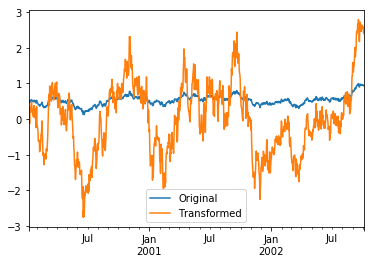

In [365]:
compare = pd.DataFrame({'Original':ts, 'Transformed':transformed})
compare.plot()

Transformation functions that have lower dimension outputs are broadcast to match the shape of the input array.

In [366]:
data_range = lambda x: x.max() - x.min()
ts.groupby(key).transform(data_range)

2000-01-08    0.649190
2000-01-09    0.649190
2000-01-10    0.649190
2000-01-11    0.649190
2000-01-12    0.649190
2000-01-13    0.649190
2000-01-14    0.649190
2000-01-15    0.649190
2000-01-16    0.649190
2000-01-17    0.649190
2000-01-18    0.649190
2000-01-19    0.649190
2000-01-20    0.649190
2000-01-21    0.649190
2000-01-22    0.649190
2000-01-23    0.649190
2000-01-24    0.649190
2000-01-25    0.649190
2000-01-26    0.649190
2000-01-27    0.649190
2000-01-28    0.649190
2000-01-29    0.649190
2000-01-30    0.649190
2000-01-31    0.649190
2000-02-01    0.649190
2000-02-02    0.649190
2000-02-03    0.649190
2000-02-04    0.649190
2000-02-05    0.649190
2000-02-06    0.649190
                ...   
2002-09-05    0.693513
2002-09-06    0.693513
2002-09-07    0.693513
2002-09-08    0.693513
2002-09-09    0.693513
2002-09-10    0.693513
2002-09-11    0.693513
2002-09-12    0.693513
2002-09-13    0.693513
2002-09-14    0.693513
2002-09-15    0.693513
2002-09-16    0.693513
2002-09-17 

Alternatively the built-in methods can be could be used to produce the same outputs

In [368]:
ts.groupby(key).transform('max') - ts.groupby(key).transform('min')

2000-01-08    0.649190
2000-01-09    0.649190
2000-01-10    0.649190
2000-01-11    0.649190
2000-01-12    0.649190
2000-01-13    0.649190
2000-01-14    0.649190
2000-01-15    0.649190
2000-01-16    0.649190
2000-01-17    0.649190
2000-01-18    0.649190
2000-01-19    0.649190
2000-01-20    0.649190
2000-01-21    0.649190
2000-01-22    0.649190
2000-01-23    0.649190
2000-01-24    0.649190
2000-01-25    0.649190
2000-01-26    0.649190
2000-01-27    0.649190
2000-01-28    0.649190
2000-01-29    0.649190
2000-01-30    0.649190
2000-01-31    0.649190
2000-02-01    0.649190
2000-02-02    0.649190
2000-02-03    0.649190
2000-02-04    0.649190
2000-02-05    0.649190
2000-02-06    0.649190
                ...   
2002-09-05    0.693513
2002-09-06    0.693513
2002-09-07    0.693513
2002-09-08    0.693513
2002-09-09    0.693513
2002-09-10    0.693513
2002-09-11    0.693513
2002-09-12    0.693513
2002-09-13    0.693513
2002-09-14    0.693513
2002-09-15    0.693513
2002-09-16    0.693513
2002-09-17 